In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
matplotlib.style.use('ggplot')
    

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """Monte Carlo prediction algorithm. calculate the value function for a given policy using sampling.
    Args
        policy: A function that maps an observation to action probability.
        env: open AI gym environment.
        num_episodes: no of episodes to sample.
        discount_factor: Gamma discount factor
        
    Returns:
        A dictionary that map from state to value.
        the state is tuple and the value is float."""
    
    #keep track the sum and count returns for each state
    #to calculate the average. we could use an array to save all
    
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    #the final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        #print out which episode we re on, usefull for debugging
        if i_episode%1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
            #generate an episode
            # An episode is an array of (state, action, reward) tuples
            episode = []
            state = env.reset()
            for t in range(100):
                action = policy(state)
                next_state, reward, done, _ = env.step(action)
                episode.append((state, action, reward))
                if done:
                    break
                state = next_state
                
            #find all state that we are visited in this episode
            #we convert each state to a tuple so that we can use it as a dict key
            states_in_episode = set([tuple(x[0]) for x in episode])
            
            for state in states_in_episode:
                #find the first occurance of the state in this episode
                first_occurance_idx = next(i for i, x in enumerate(episode) if x[0] == state)
                #sum up all rewards since the first occurance
                G = sum([x[2] * (discount_factor**i) for i, x in enumerate(episode[first_occurance_idx:])])
                #calculate average return for this state
                returns_sum[state] += G
                returns_count[state] += 1.0
                V[state] = returns_sum[state] / returns_count[state]
            
                
    return V

In [4]:
def sample_policy(observation):
    
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 10000/10000.

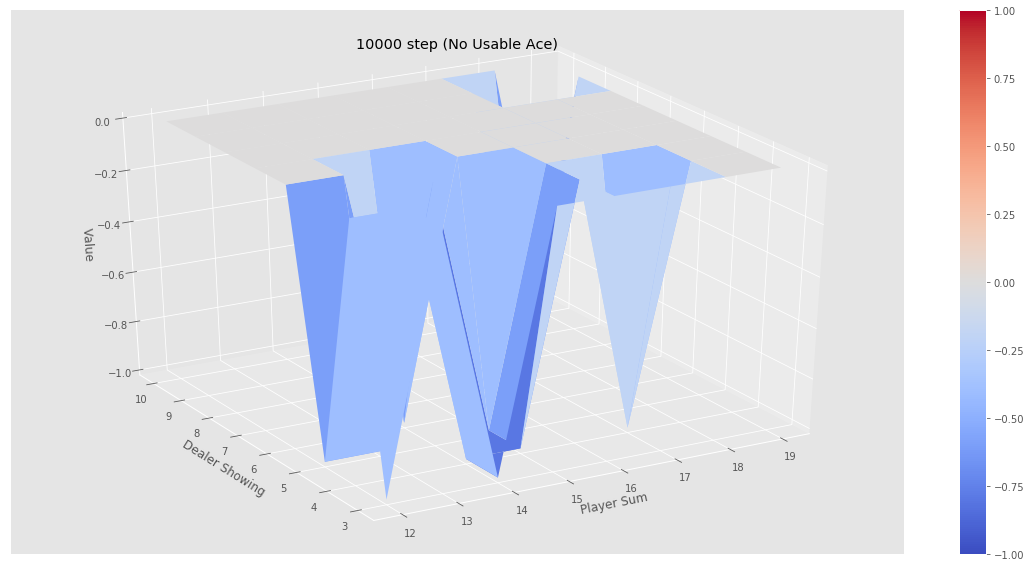

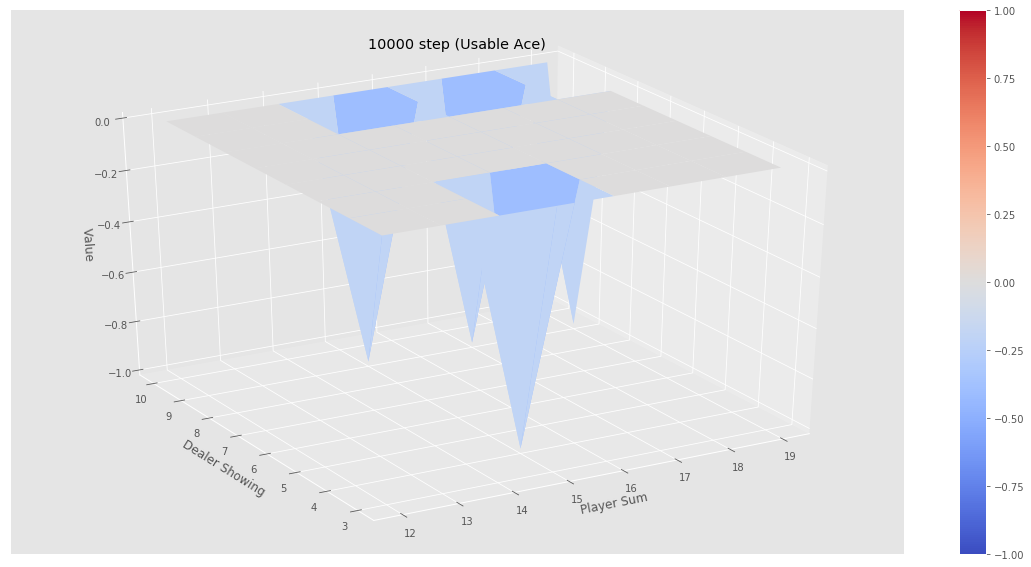

Episode 500000/500000.

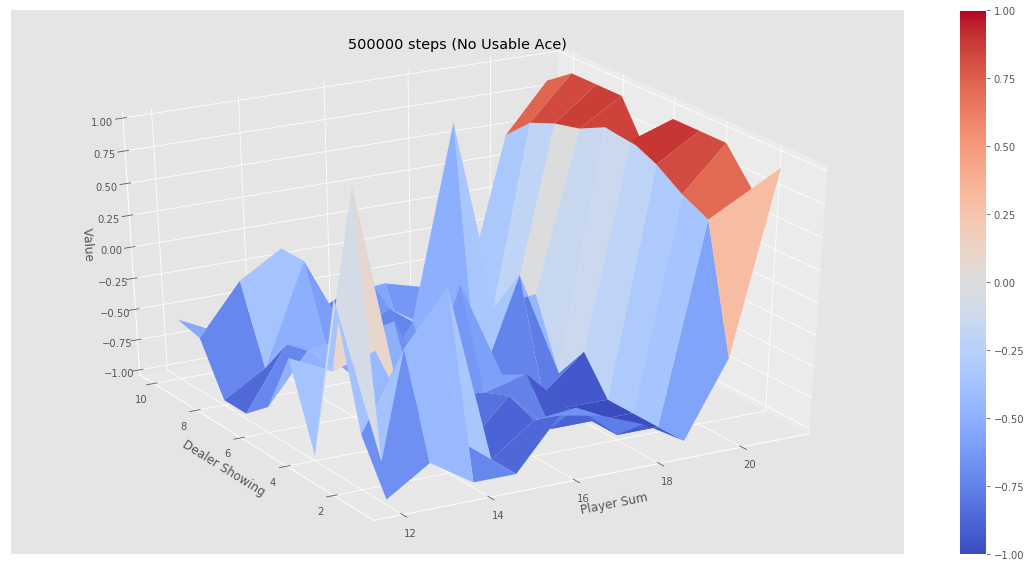

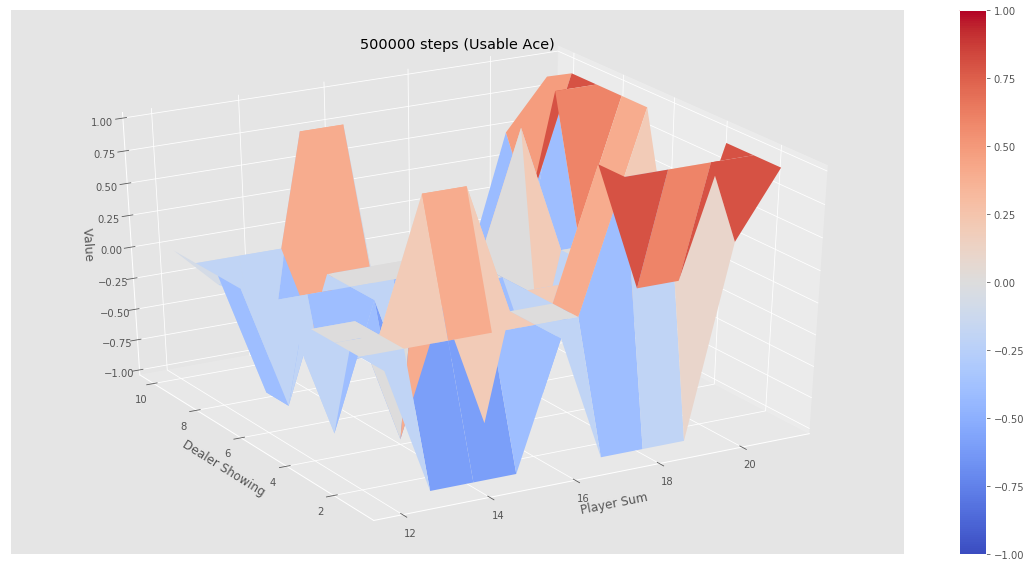

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title = "10000 step")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title = "500000 steps")